# Reduced Order Model using Gaussian Process Regression

## Mathematical theory

The objective of the ROM is to predict the entire state of the system in the unexplored parts of the design space. It is possible to achieve this result by pairing dimensionality reduction via POD with the regression performed using GPR. 


The POD (also known as Principal Component Analysis) is a decomposition technique in which the data matrix $\mathbf{X} \subset \mathbb{R}^{n,p}$ is decomposed into a matrix $\mathbf{U} \subset \mathbb{R}^{n,p}$ and a matrix $\mathbf{A} \subset \mathbb{R}^{p,p}$:


\begin{equation}
\mathbf{X} = \mathbf{U} \mathbf{A}^T
\end{equation}


The data matrix is formed by arranging $p$ vectors of dimension $n$ as column vectors. The matrices $\mathbf{U}$ and $\mathbf{A}$ are orthogonal matrices which form a basis for the span of the columns and rows of $\mathbf{X}$, respectively.  The POD is employed for dimensionality reduction because the $q$-order truncation of the new basis is the one that minimizes the $l_2$ norm reconstruction error. This means that the matrix $\mathbf{X}$ can be approximated as:


\begin{equation}
\mathbf{X} \approx \mathbf{U}_q \mathbf{A}_q^T
\end{equation}

where $\mathbf{U}_q \subset \mathbb{R}^{n,q}$ and $\mathbf{A}_q \subset \mathbb{R}^{p,q}$ represent the $q$-order truncation of matrices $\mathbf{U}$ and $\mathbf{A}$. 


The matrix $\mathbf{X}$ is built by collecting the results obtained by sampling the design space. The choice of the $p$ combinations of design parameters can be determined through a Design Of Experiments (DOE). 

Each vector $\mathbf{x}$ can be reconstructed using its low-dimensional projection:


\begin{equation}
\mathbf{x}(\boldsymbol{\theta}) = \mathbf{U}_q \mathbf{a}_q(\mathbf{\boldsymbol{\theta}})
\end{equation}

The matrix $\mathbf{U}_q$ encodes the physical information of the system in $q$ vectors (modes), while the vector $\mathbf{a}_q$ contains the $q$ weights for each value of $\boldsymbol{\theta}$ such that:


\begin{equation}
\mathbf{x}(\boldsymbol{\theta}) = \sum_{i=1}^q a_{q,i}(\boldsymbol{\theta}) \boldsymbol{u}_{q,i}
\end{equation}

This framework is particularly useful in the context of regression, because it allows to regress $p$ $q$-dimensional vectors instead of $p$ $n$-dimensional vectors, where $q \ll n$. 


The prediction the solution in the unexplored region of the design space is carried out using a GPR model. In general, the regression problem can be formulated as:
\begin{equation}
y = f(x) + \epsilon
\end{equation}

where $y$ is the observed value, $f(x)$ is the underling function we are trying to model,  $x$ is the independent variable and $\epsilon \sim \mathcal{N}(0, \sigma_n^2)$ represents the noise, modeled as an independent, identically distributed (i.i.d.) Gaussian distribution. In the GPR framework, $f(x)$ is a sample from a Gaussian Process (GP), which is defined as a Gaussian distribution over functions [1](https://doi.org/10.5555/1162254):


\begin{equation}
f(x) \sim GP(m(x), k(x, x'))
\end{equation}

A GP is completely determined by its mean function $m(x)$ and its covariance function $k(x,x')$. This framing is equivalent to say that the data can be represented as a sample from a multivariate Gaussian distribution, known as the prior distribution:

\begin{equation}
\begin{bmatrix}
\mathbf{y} \\
\mathbf{f}_{*}
\end{bmatrix} 
\sim \mathcal{N} \left( \mathbf{0}, 
\begin{bmatrix}
\mathbf{K(\mathbf{X},\mathbf{X})} + \sigma_n^2 \mathbf{I} & \mathbf{K}(\mathbf{X}, \mathbf{X}_{*})\\
\mathbf{K}(\mathbf{X}_{*},\mathbf{X}) & \mathbf{K}(\mathbf{X}_{*}, \mathbf{X}_{*})
\end{bmatrix}
\right)
\end{equation}

where $\mathbf{y}$ represents the target value of the data to regress, $\mathbf{f}_{*} = f(\mathbf{X}_{*})$ is the prediction in the unknown region $\mathbf{X}_{*}$. The matrix $\mathbf{K}$ is computed by applying the kernel function on the training data $\mathbf{X}$ and the prediction data $\mathbf{X}_{*}$. 


The prior and the likelihood of the model are both assumed to be Gaussian distributions. The likelihood express the probability of seeing the data $\mathbf{y}$ given our choice of the model. The posterior distribution can be calculated by applying Bayes' theorem:

\begin{equation}
p(\mathbf{f}| \mathbf{y}, \mathbf{X}) = \frac{p(\mathbf{y}| \mathbf{f}, \mathbf{X})  \ p(\mathbf{f}| \mathbf{X})}{p(\mathbf{y}|\mathbf{X})}
\end{equation}

Finally, the posterior predictive distribution can be calculated by marginalizing the distribution of all the possible predictions using the posterior distribution:

\begin{equation}
p(\mathbf{f}_{*} | \mathbf{X}_{*}, \mathbf{y}, \mathbf{X}) = \int_{-\infty}^{+\infty} p(\mathbf{f}_{*} | \mathbf{X}_{*}, \mathbf{f}) p(\mathbf{f}| \mathbf{y}, \mathbf{X}) d\mathbf{f}
\end{equation}

By exploiting the properties of the Gaussian distribution, the posterior predictive distribution becomes:

\begin{equation}
p(\mathbf{f}_{*} | \mathbf{X}_{*}, \mathbf{y}, \mathbf{X}) = \mathcal{N} (\bar{\mathbf{f}}_{*}, \mathrm{cov}(\mathbf{f}_{*}))
\end{equation}


\begin{equation}
\bar{\mathbf{f}}_{*} = \mathbf{K}_{*}^{T} [\mathbf{K} + \sigma_{n}^2 \mathbf{I}]^{-1}\mathbf{y}
\end{equation}


\begin{equation}
\mathrm{cov}(\bar{\mathbf{f}}_{*}) = \mathbf{K}_{**} - \mathbf{K}_{*}^{T} [\mathbf{K} + \sigma_{n}^2\mathbf{I}]^{-1}\mathbf{K}_{*}
\end{equation}

where, for compactness, $\mathbf{K} =\mathbf{K}(\mathbf{X}, \mathbf{X})$, $\mathbf{K}_{*} =\mathbf{K}(\mathbf{X}, \mathbf{X}_{*})$ and $\mathbf{K}_{**} =\mathbf{K}(\mathbf{X}_{*}, \mathbf{X}_{*})$. 


The last step in training the model concerns the selection of the hyperparameters. In particular, the hyperparameters to tune are the observation noise $\sigma_{n}$ and the kernel hyperparameters $\phi$. The selection of the hyperparameters is done by minimizing the negative log likelihood:


\begin{equation}
-\mathrm{log} \ p(\mathbf{y}| \mathbf{X}) = \frac{1}{2}\mathbf{y}^T(\mathbf{K}(\phi) + \sigma_n^2\mathbf{I})^{-1}\mathbf{y} + \frac{1}{2} \mathrm{log} \ |\mathbf{K}(\phi) + \sigma_n^2\mathbf{I}| + \frac{n}{2} \mathrm{log} \ 2\pi
\end{equation}

Finally, once the model is trained, we are left with a ROM capable of mapping each combination of PaSR parameters $\boldsymbol{\theta}$ to the low-dimensional representation $\mathbf{a}_{q, \mathrm{GPR}}$. The solution is then obtained by projecting $\mathbf{a}_{q, \mathrm{GPR}}$ onto the original higher dimensional space:

\begin{equation}
\mathbf{x_{\mathrm{GPR}}} = \mathbf{U}_q \mathbf{a}_{q, \mathrm{GPR}}
\end{equation}

## Example

The first cell is used to download the dataset from zenodo using the ```zenodo_get ``` command. This command can be installed via:
```console
pip install zenodo_get
```
Otherwise, the dataset can be downloaded directly from [zenodo](https://www.zenodo.org/record/7786311).

In [ ]:
import zenodo_get

! zenodo_get -d 10.5281/zenodo.7786311
! unzip DT_dataset.zip

Here we import some libraries and we create the data matrix `X` that contains the 45 simulations.

In [1]:
import glob
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

def read_simulation(filepath):
    sim = np.array(pd.read_csv(filepath))
    xyz = np.array(sim[:,1:4])

    column = np.empty((n_3D, ))
    for i, f in enumerate(features):
        if xyz.shape[0] != n_cells_3D:
            column[i*n_cells_3D:(i+1)*n_cells_3D] = griddata(xyz, sim[:,4+i], xyz_25, method='nearest')
        else:
            column[i*n_cells_3D:(i+1)*n_cells_3D] = sim[:,4+i]

    return column

path = './DT_dataset'

P_df = pd.read_csv(f'{path}/cases_parameters.csv')
P = np.array(P_df.iloc[:,2:])
m = P.shape[0]

features = ['NOx', 'CO', 'OH', 'H2', 'H2O', 'CO2', 'O2', 'CH4', 'T']
n_features = len(features)

# The simulations with different inlet diameter use different grids.
# We interpolate them on the coarsest grid, which is the one for D=25mm.

filepath = glob.glob(f'{path}/Numerical_data/Case6_*')
xyz_25 = np.array(pd.read_csv(filepath[0]).iloc[:,1:4])
n_cells_3D = xyz_25.shape[0]

n_3D = n_features*n_cells_3D
X_3D = np.empty((n_3D,m))
for i in range(P_df.shape[0]):
    filepath =  glob.glob(f'{path}/Numerical_data/Case{P_df.iloc[i,1]}_*')
    X_3D[:,i] = read_simulation(filepath[0])
    print(f'Simulation {i+1}/{m}', end='\r', flush=True)

To speed-up the calculations, we consider only the data on the $y=0$ plane. Skip this cell if you want to calculate the entire
3D solution.

In [2]:
import pyvista as pv

# read the mesh using Pyvista
mesh = pv.read(f'{path}/grid.vtu')

for i in range(m):
    print(f'Storing simulation {i+1}/{m}', end='\r', flush=True)
    for j in range(n_features):
        mesh[f'{i}/{j}'] = X_3D[j*n_cells_3D:(j+1)*n_cells_3D, i]


plane = mesh.ctp(pass_cell_data=True).slice(normal='y', origin=(0,1e-3,0), progress_bar=True, generate_triangles=True)

xyz = plane.cell_centers().points
n_cells = plane.n_cells
n = n_features*n_cells
X = np.empty((n,m))

for i in range(m):
    print(f'Retrieving simulation {i+1}/{m}', end='\r', flush=True)
    for j in range(n_features):
        X[j*n_cells:(j+1)*n_cells, i] = plane.cell_data[f'{i}/{j}']

Slicing: 100%|██████████[00:13<00:00]


## Training the GPR model

In the first cell we train the model using the function `fit()`, then we predict the POD coefficients for the test conditions in `P_test`. 


In [3]:
from gpr import GPR

i_test = [0, 21, 27, 38] # index of the testing simulations

P_train = np.delete(P, i_test, axis=0)
P_test = P[i_test, :]

X_train = np.delete(X, i_test, axis=1)
X_test = X[:, i_test]

# Create the gpr object
gpr = GPR(X_train, n_features, xyz, P_train)

# Calculates the POD coefficients ap and the uncertainty for the test simulations
gpr.fit()
models, likelihoods = gpr.train()
Ap, Sigmap = gpr.predict(P_test)


## Project in the original dimensionality

In this cell we use the function `reconstruct()` to project the set of POD coeffiecient in the higher dimensional space.

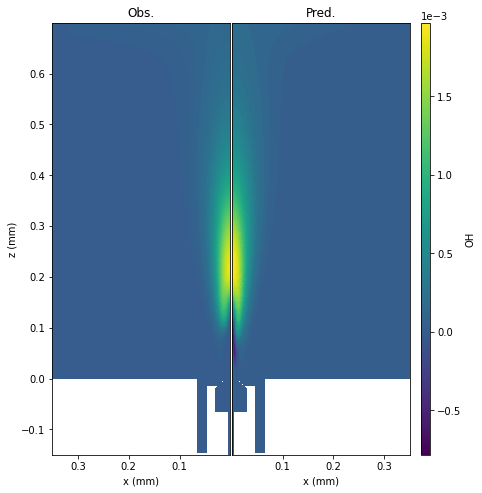

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_comparison_3D(mesh, zs, normal, origin, axis, feature, cmap='viridis'):
    n_cases = len(zs)
    cases = ['Obs.', 'Pred.']  
    for i, case in enumerate(cases):
        mesh[case] = zs[i]
        
    plane = mesh.ctp().slice(normal=normal, origin=origin, generate_triangles=True)
    
    vmin = np.min([plane[cases[0]].min(), plane[cases[1]].min()])
    vmax = np.max([plane[cases[0]].max(), plane[cases[1]].max()])

    extent_min = [-0.2, -0.2, 0.1]
    extent_max = [0.2, 0.2, 0.5]

    x = plane.points
    tri = plane.faces.reshape((-1,4))[:, 1:]
    
    fig, axs = plt.subplots(ncols=n_cases, figsize=(5.4, 6))
    levels = 64

    axis_labels = ['x', 'y', 'z']
    fig.subplots_adjust(bottom=0., top=1., left=0, right=.925, wspace=0.0, hspace=0.05)

    for i, ax in enumerate(axs):
        if i == 0:
            ax.invert_xaxis()
        
        cs = ax.tricontourf(x[:,axis[0]], x[:,axis[1]], tri, plane[cases[i]], cmap=cmap,
                        levels=levels, vmin=vmin, vmax=vmax)
        
        ax.set_aspect('equal')
        ax.set_xlabel(f'{axis_labels[axis[0]]} (mm)')
        ax.set_title(cases[i])

        if i > 0:
            ax.tick_params(axis='y', which='both', left=False, labelleft=False)
        else:
            ax.set_ylabel(f'{axis_labels[axis[1]]} (mm)')
    
    
    ax_bounds = axs[1].get_position().bounds
    cb_ax = fig.add_axes([0.95, ax_bounds[1], 0.025, ax_bounds[3]])
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                        cax=cb_ax, orientation='vertical', label=feature)
    fmt = mpl.ticker.ScalarFormatter(useMathText=True)
    cbar.formatter.set_powerlimits((0, 4))
    cb_ax.yaxis.set_offset_position('left')
    
    plt.show()

def plot_comparison(plane, zs, feature, cmap='viridis'):
    n_cases = len(zs)
    cases = ['Obs.', 'Pred.']  
    for i, case in enumerate(cases):
        plane[case] = zs[i]
        
    plane = plane.ctp()
    
    vmin = np.min([plane[cases[0]].min(), plane[cases[1]].min()])
    vmax = np.max([plane[cases[0]].max(), plane[cases[1]].max()])

    extent_min = [-0.2, -0.2, 0.1]
    extent_max = [0.2, 0.2, 0.5]

    x = plane.points
    tri = plane.faces.reshape((-1,4))[:, 1:]
    
    fig, axs = plt.subplots(ncols=n_cases, figsize=(5.4, 6))
    levels = 64

    axis_labels = ['x', 'y', 'z']
    fig.subplots_adjust(bottom=0., top=1., left=0, right=.925, wspace=0.0, hspace=0.05)

    for i, ax in enumerate(axs):
        if i == 0:
            ax.invert_xaxis()
        
        cs = ax.tricontourf(x[:,0], x[:,2], tri, plane[cases[i]], cmap=cmap,
                        levels=levels, vmin=vmin, vmax=vmax)
        
        ax.set_aspect('equal')
        ax.set_xlabel(f'{axis_labels[0]} (mm)')
        ax.set_title(cases[i])

        if i > 0:
            ax.tick_params(axis='y', which='both', left=False, labelleft=False)
        else:
            ax.set_ylabel(f'{axis_labels[2]} (mm)')
    
    
    ax_bounds = axs[1].get_position().bounds
    cb_ax = fig.add_axes([0.95, ax_bounds[1], 0.025, ax_bounds[3]])
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                        cax=cb_ax, orientation='vertical', label=feature)
    fmt = mpl.ticker.ScalarFormatter(useMathText=True)
    cbar.formatter.set_powerlimits((0, 4))
    cb_ax.yaxis.set_offset_position('left')
    
    plt.show()

# Reconstruct the high-dimensional state from the POD coefficients
Xp = gpr.reconstruct(Ap)

# Select the feature to plot
str_ind = 'OH'
ind = features.index(str_ind)

x_test = X_test[ind*n_cells:(ind+1)*n_cells,3]
xp_test = Xp[ind*n_cells:(ind+1)*n_cells, 3]

plot_comparison(plane, [x_test, xp_test], 'OH')

## Use a different likelihood.

In this cell we use a different likelihood from the standard GaussianLikelihood to fix the noise in the dataset.

/opt/anaconda3/envs/env_ml2/lib/python3.9/site-packages/gpytorch/likelihoods/gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(


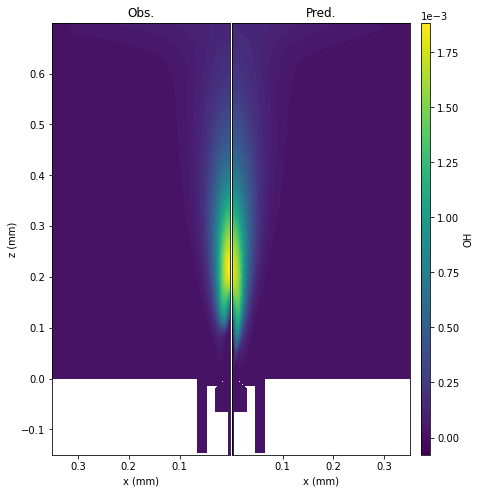

In [9]:
import torch
import gpytorch

noise = 1e-2*torch.ones(P_train.shape[0])
likelihood = gpytorch.likelihoods.FixedNoiseGaussianLikelihood(noise=noise)
    
models, likelihoods = gpr.train(likelihood=likelihood)
Ap, Sigmap = gpr.predict(P_test)

Xp = gpr.reconstruct(Ap)

str_ind = 'OH'
ind = features.index(str_ind)

x_test = X_test[ind*n_cells:(ind+1)*n_cells,3]
xp_test = Xp[ind*n_cells:(ind+1)*n_cells, 3]

plot_comparison(plane, [x_test, xp_test], 'OH')

## Use a different kernel and mean

In this cell we use show how to use different mean and kernel functions.

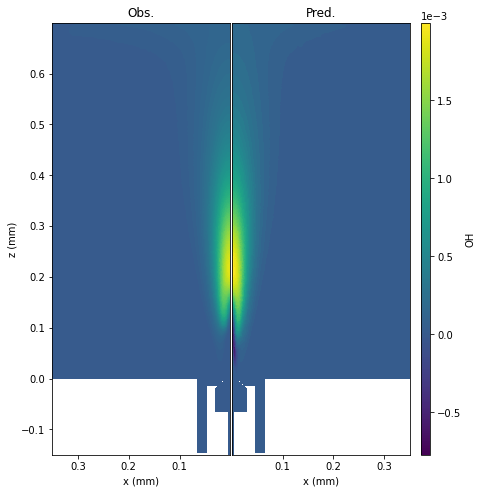

In [10]:
from gpytorch.means import LinearMean
from gpytorch.kernels import PiecewisePolynomialKernel, LinearKernel

input_size = P_test.shape[1]
mean = LinearMean(input_size)
kernel = PiecewisePolynomialKernel()

models, likelihoods = gpr.train(mean=mean, kernel=kernel)
Ap, Sigmap = gpr.predict(P_test)

Xp = gpr.reconstruct(Ap)

str_ind = 'OH'
ind = features.index(str_ind)

x_test = X_test[ind*n_cells:(ind+1)*n_cells,3]
xp_test = Xp[ind*n_cells:(ind+1)*n_cells, 3]

plot_comparison(plane, [x_test, xp_test], 'OH')

## Use a different lenghtscale for each parameter

In this cell we use show how to train a lengthscale for each parameter (anisotropic lenghtscales).

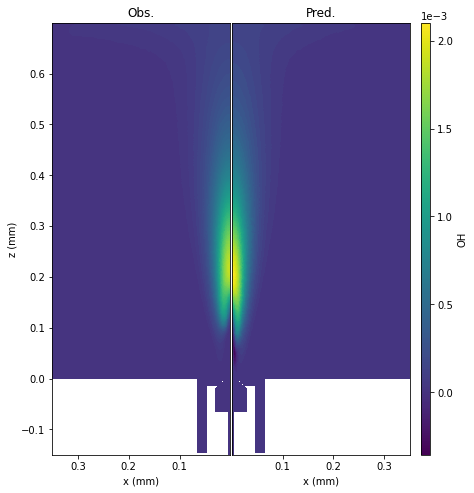

In [11]:
from gpytorch.kernels import MaternKernel

kernel = MaternKernel(ard_num_dims=P_train.shape[1])

models, likelihoods = gpr.train(kernel=kernel)
Ap, Sigmap = gpr.predict(P_test)

Xp = gpr.reconstruct(Ap)

str_ind = 'OH'
ind = features.index(str_ind)

x_test = X_test[ind*n_cells:(ind+1)*n_cells,3]
xp_test = Xp[ind*n_cells:(ind+1)*n_cells, 3]

plot_comparison(plane, [x_test, xp_test], 'OH')

## Use the multitask model.

In this cell we use show how to the multitask model to compute a single GPR model for all the latent dimensions.

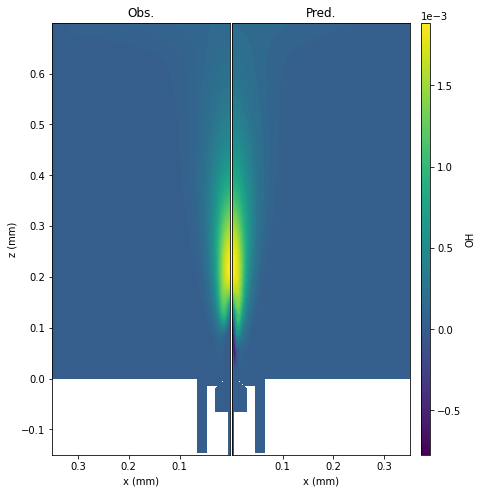

In [12]:
from gpytorch.means import ConstantMean
from gpytorch.kernels import MaternKernel

gpr = GPR(X_train, n_features, xyz_25, P_train, gpr_type='MultiTask')
gpr.fit(n_modes=99.5)
mean = ConstantMean(batch_shape=torch.Size([gpr.r]))
kernel = MaternKernel(batch_shape=torch.Size([gpr.r]))

models, likelihoods = gpr.train()
Ap, Sigmap = gpr.predict(P_test)

# Reconstruct the high-dimensional state from the POD coefficients
Xp = gpr.reconstruct(Ap)

# Select the feature to plot
str_ind = 'OH'
ind = features.index(str_ind)

x_test = X_test[ind*n_cells:(ind+1)*n_cells,3]
xp_test = Xp[ind*n_cells:(ind+1)*n_cells, 3]

plot_comparison(plane, [x_test, xp_test], 'OH')

## Update the model.

In this cell we show how to add new data to an existing model.

/opt/anaconda3/envs/env_ml2/lib/python3.9/site-packages/gpytorch/likelihoods/noise_models.py:144: NumericalWarning: Very small noise values detected. This will likely lead to numerical instabilities. Rounding small noise values up to 1e-06.
  warnings.warn(


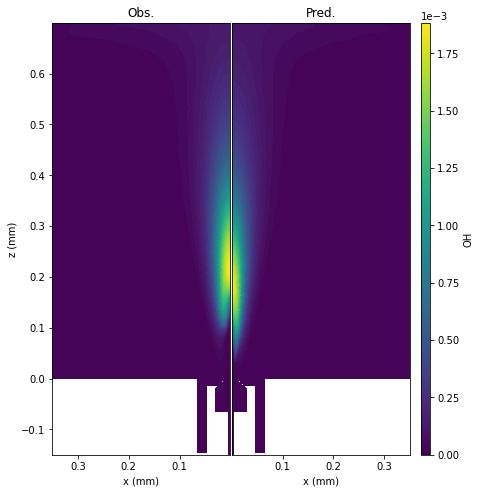

In [13]:
gpr = GPR(X_train, n_features, xyz, P_train)
gpr.fit()
models, likelihoods = gpr.train()
Ap, Sigmap = gpr.predict(P_test)
Xp = gpr.reconstruct(Ap)

Ap_new = np.zeros_like(Ap)
Sigmap_new = np.zeros_like(Sigmap)

for i in range(gpr.r):
    Ap_new[:, i] = np.random.normal(Ap[:,i].mean(), 0.1*np.abs(Ap[:,i].mean()), size=Ap.shape[0])
    Sigmap_new[:, i] = np.random.normal(0, Sigmap_new[:,i].mean(), size=Sigmap.shape[0])

gpr.update(P_test, Ap_new, Sigmap_new, retrain=True)
Ap, Sigmap = gpr.predict(P_test)
Xp = gpr.reconstruct(Ap)

# Select the feature to plot
str_ind = 'OH'
ind = features.index(str_ind)

x_test = X_test[ind*n_cells:(ind+1)*n_cells,3]
xp_test = Xp[ind*n_cells:(ind+1)*n_cells, 3]

plot_comparison(plane, [x_test, xp_test], 'OH')

## Use Constrained POD to calculate the POD coefficients

Regular POD can be seen also as an optimization method to mimimize the reconstruction error:

\begin{equation}
\begin{aligned}
\min_{a} \quad & || x - \mathbf{U}a||_2.\\
\end{aligned}
\end{equation}

We can constrain this optimization to ensure some physical properties (i.e. the positivity of temperature and species mass fraction):

\begin{equation}
\begin{aligned}
\min_{g} \quad & || x - \mathbf{U}g||_2\\
\textrm{s.t.} \quad & \mathbf{U}g \geq x_{min} \\
& \mathbf{U}g \leq x_{max}. \\
\end{aligned}
\end{equation}

The GPR model is then trained on the new $\mathbf{G}$ coefficients which satisfy the constraints.

In [ ]:
n_modes = 5
gpr = GPR(X_train, n_features, xyz, P_train)

xmin = np.zeros_like(X_train[:,0])
xmax = np.ones_like(X_train[:,0])
i_T = features.index('T')
xmin[i_T*n_cells:(i_T+1)*n_cells] = 250
xmax[i_T*n_cells:(i_T+1)*n_cells] = 3000

gpr.fit(select_modes='number', n_modes=n_modes, decomp_type='CPOD', limits=[xmin, xmax], abstol=1e-2)
models, likelihoods = gpr.train()
Gp, Sigmap = gpr.predict(P_test)

Xp = gpr.reconstruct(Gp)

str_ind = 'OH'
ind = features.index(str_ind)

x_test = X_test[ind*n_cells:(ind+1)*n_cells,3]
xp_test = Xp[ind*n_cells:(ind+1)*n_cells, 3]

plot_comparison(plane, [x_test, xp_test], 'OH')

## Physics-informed GPR.

In this cell we show how to introduce a physical loss in the GPR.

In [16]:
from gpr import CGPR

# Class for the added loss
class AddedLoss(gpytorch.mlls.AddedLossTerm):
        def __init__(self, kwargs):
            self.output = kwargs.get('output')
            self.loss_ml = kwargs.get('loss_ml')
            self.verbose = kwargs.get('verbose')
            
        def loss(self):
            loss_l = limit_loss(self.output.mean) 
                        
            return loss_l

def g(x):
    return torch.maximum(torch.tensor(0),x)

def scale_limits(limits):
    X_cnt = torch.from_numpy(cgpr.X_cnt)
    X_scl = torch.from_numpy(cgpr.X_scl)
    n_points = cgpr.n_points
    
    limits0 = []
    for limit in limits:
        limit_torch = torch.from_numpy(limit)
        limit0 = torch.zeros((X_cnt.shape[0],))

        for i in range(cgpr.n_features):
            limit0[i*n_points:(i+1)*n_points] = ((limit[i] - X_cnt[i*n_points:(i+1)*n_points, 0])
                                                /X_scl[i*n_points:(i+1)*n_points, 0])

        limits0.append(limit0)

    return limits0

def limit_loss(output):
    X0_output = torch.linalg.multi_dot([Ur, Sigma_r, output.T])

    limit_error = torch.zeros_like(X0_output)

    for j in range(limit_error.shape[1]):
        limit_error[:,j] = (g(limits0[0] - X0_output[:,j]) + 
                            g(X0_output[:,j] - limits0[1]))
    
    return -alpha_l*torch.linalg.matrix_norm(limit_error)

def compute_alpha_l(loss_mll, Vr_pred_train):
        loss_l = limit_loss(Vr_pred_train).detach()

        if torch.abs(loss_l) < 1e-3:
            alpha_l = torch.tensor(1)
        else:
            alpha_l = 0.1*torch.abs(loss_mll/loss_l)

        return alpha_l

n_cstr = 2
d_array = np.linspace(P_train[:,0].min(), P_train[:,0].max(), n_cstr)
h2_array = np.linspace(P_train[:,1].min(), P_train[:,1].max(), n_cstr)
phi_array = np.linspace(P_train[:,2].min(), P_train[:,2].max(), n_cstr)

d_grid, h2_grid, phi_grid = np.meshgrid(d_array, h2_array, phi_array)
P_cstr = np.zeros((n_cstr**3,3))
P_cstr[:,0] = d_grid.flatten()
P_cstr[:,1] = h2_grid.flatten()
P_cstr[:,2] = phi_grid.flatten()

cgpr = CGPR(X_train, n_features, xyz, P_train, P_cstr, AddedLoss)
cgpr.fit()

Ur = torch.from_numpy(cgpr.Ur).contiguous().double()
Sigma_r = torch.from_numpy(np.diag(cgpr.Sigma_r)).contiguous().double()

limit_min = np.array([0, 0, 0, 0, 0, 0, 0, 0, 200], dtype='float')
limit_max = np.array([1, 1, 1, 1, 1, 1, 1, 1, 5000], dtype='float')
limits0 = scale_limits([limit_min, limit_max])

alpha_l = 1.
loss_mll, Vr_pred_train = cgpr.compute_mll()
alpha_l = compute_alpha_l(loss_mll, Vr_pred_train)

cgpr.train(max_iter=50, lr=0.05, verbose=True)
Ap, Sigmap = cgpr.predict(P_test)
Xp = cgpr.reconstruct(Ap)


tensor(1.8593, dtype=torch.float64)
Iter 1/50 - Loss: 1.47e+00 - Noise: 6.93e-01
Iter 2/50 - Loss: 1.35e+00 - Noise: 6.69e-01
Iter 3/50 - Loss: 1.33e+00 - Noise: 6.44e-01
Iter 4/50 - Loss: 1.33e+00 - Noise: 6.21e-01
Iter 5/50 - Loss: 1.32e+00 - Noise: 5.98e-01
Iter 6/50 - Loss: 1.31e+00 - Noise: 5.76e-01
Iter 7/50 - Loss: 1.30e+00 - Noise: 5.55e-01
Iter 8/50 - Loss: 1.29e+00 - Noise: 5.34e-01
Iter 9/50 - Loss: 1.28e+00 - Noise: 5.13e-01
Iter 10/50 - Loss: 1.27e+00 - Noise: 4.94e-01
Iter 11/50 - Loss: 1.26e+00 - Noise: 4.74e-01
Iter 12/50 - Loss: 1.25e+00 - Noise: 4.56e-01
Iter 13/50 - Loss: 1.24e+00 - Noise: 4.38e-01
Iter 14/50 - Loss: 1.23e+00 - Noise: 4.21e-01
Iter 15/50 - Loss: 1.22e+00 - Noise: 4.04e-01
Iter 16/50 - Loss: 1.21e+00 - Noise: 3.88e-01
Iter 17/50 - Loss: 1.20e+00 - Noise: 3.72e-01
Iter 18/50 - Loss: 1.20e+00 - Noise: 3.57e-01
Iter 19/50 - Loss: 1.19e+00 - Noise: 3.43e-01
Iter 20/50 - Loss: 1.18e+00 - Noise: 3.29e-01
Iter 21/50 - Loss: 1.17e+00 - Noise: 3.15e-01
Iter 22

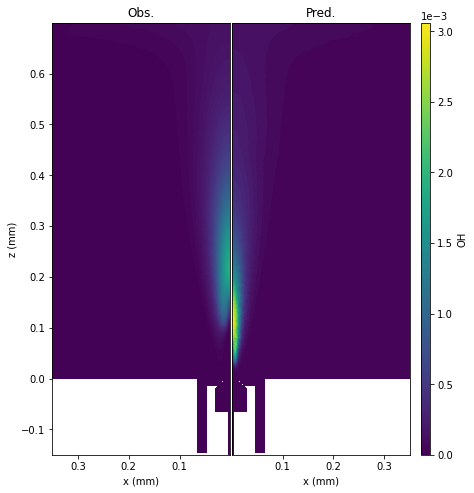

In [21]:
# Select the feature to plot
str_ind = 'OH'
ind = features.index(str_ind)

x_test = X_test[ind*n_cells:(ind+1)*n_cells,3]
xp_test = Xp[ind*n_cells:(ind+1)*n_cells, 3]

plot_comparison(plane, [x_test, xp_test], 'OH')
